<div id = 3 style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#b02222;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 6rem;
              color:white;
          text-align:center;
          margin:10 auto;
          ">
    ITERATION 6: Focus on identifying and removing/imputing outliers


</h2>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import missingno as msno

import warnings

from functions_20221023 import get_columns, add_supplements, feature_engineer

In [2]:
VERSION = '06'

warnings.filterwarnings("ignore")

In [3]:
LABEL = 'Price'

columns, booleans, floats, categories , custom = get_columns(version=VERSION)

print(colored(f"features", "blue"), "-> ", columns)

columns.insert(0, LABEL)
print(colored(f"label", "green"), "-> ", LABEL)

features ->  ['bedrooms', 'bathrooms', 'nearestStation', 'location.latitude', 'location.longitude', 'latitude_deviation', 'longitude_deviation', 'tenure.tenureType']
label ->  Price


In [4]:
IN_COLAB = False

filename = f'df_listings_v{VERSION}.csv'
#remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'

df_pathname_raw = f'../../data/source/{filename}'
#df_pathname_tidy = f'../../data/final/{filename}'

df_orig = pd.read_csv(df_pathname_raw, on_bad_lines='error', index_col=0)

In [5]:
df = add_supplements(df_orig)
df = feature_engineer(df, version=VERSION)

['\nground rent: £150 p.a. ' '   semi-detached property'
 " 'for sale by online auction, starting bid of£250,000, terms and conditions apply'."
 ...
 '‘a’rated energy efficiency apartments ensuring huge savings on energy bills'
 '‘mansion block’ style ex-local authority apartment' '‘nash built’ house'] [1 1 1 ... 1 1 1]
118449 118449


In [6]:
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54067 entries, 14520525 to 126181118
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                54067 non-null  int64  
 1   bedrooms             52265 non-null  float64
 2   bathrooms            50569 non-null  float64
 3   nearestStation       54067 non-null  float64
 4   location.latitude    54057 non-null  float64
 5   location.longitude   54067 non-null  float64
 6   latitude_deviation   54057 non-null  float64
 7   longitude_deviation  54067 non-null  float64
 8   tenure.tenureType    50413 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


<AxesSubplot: >

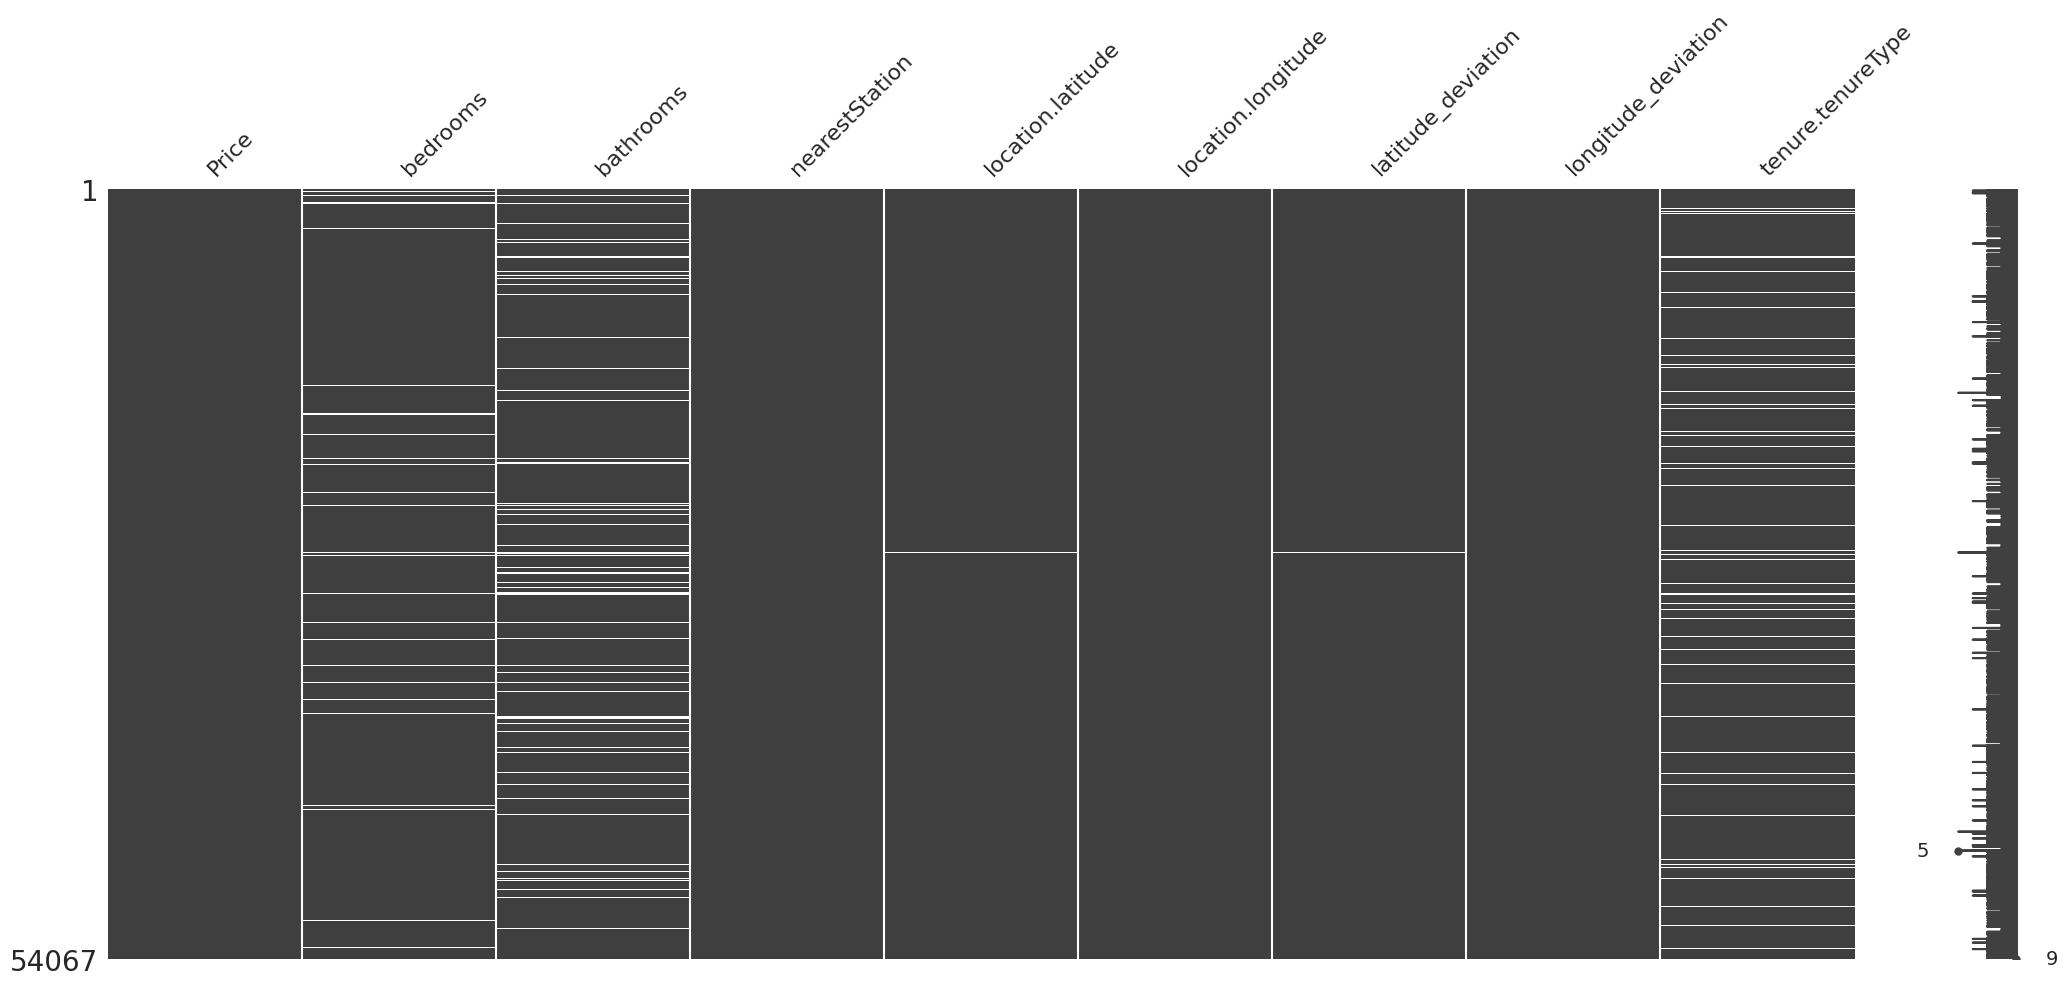

In [7]:
msno.matrix(df)

In [8]:
i = -1

bedrooms


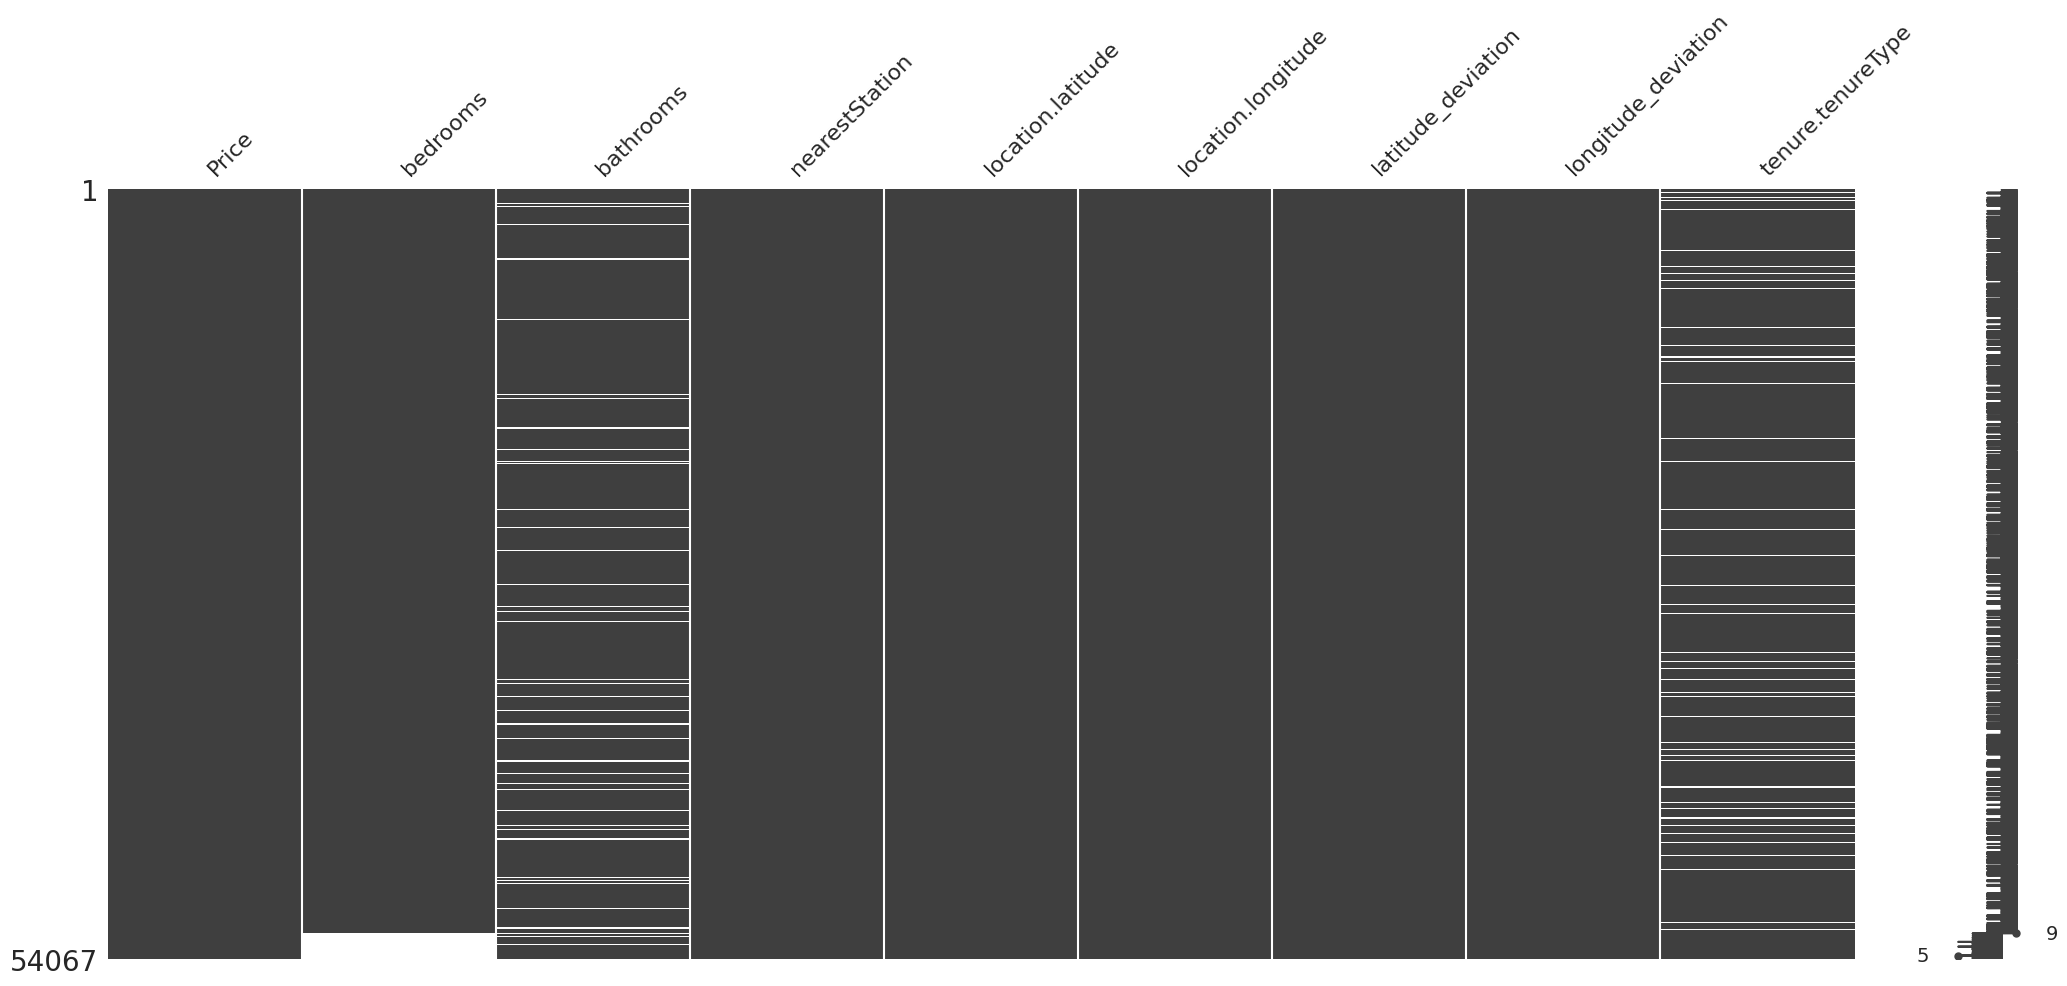

In [9]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

bathrooms


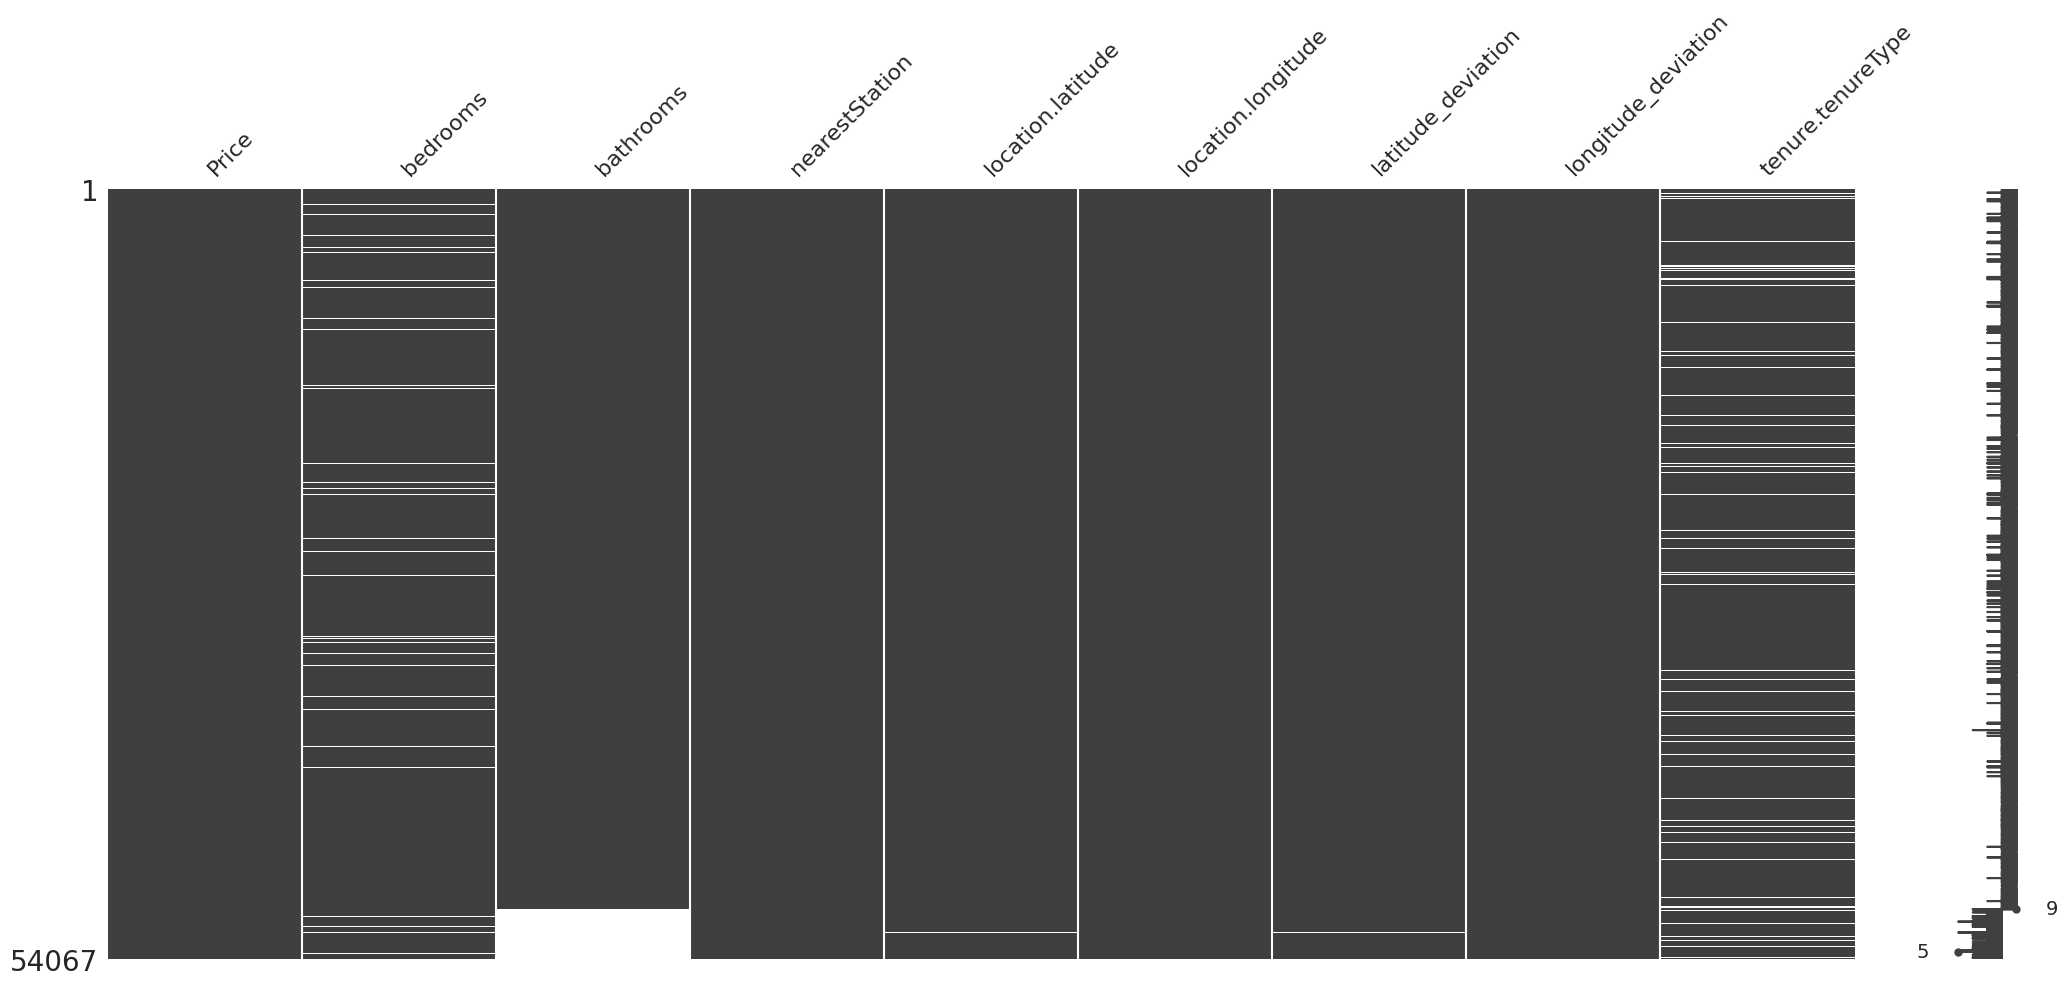

In [10]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

Conclusion: the missing data is missing completely at random. There is no correlation between missing data and any other factor which can be identified.

tenure.tenureType


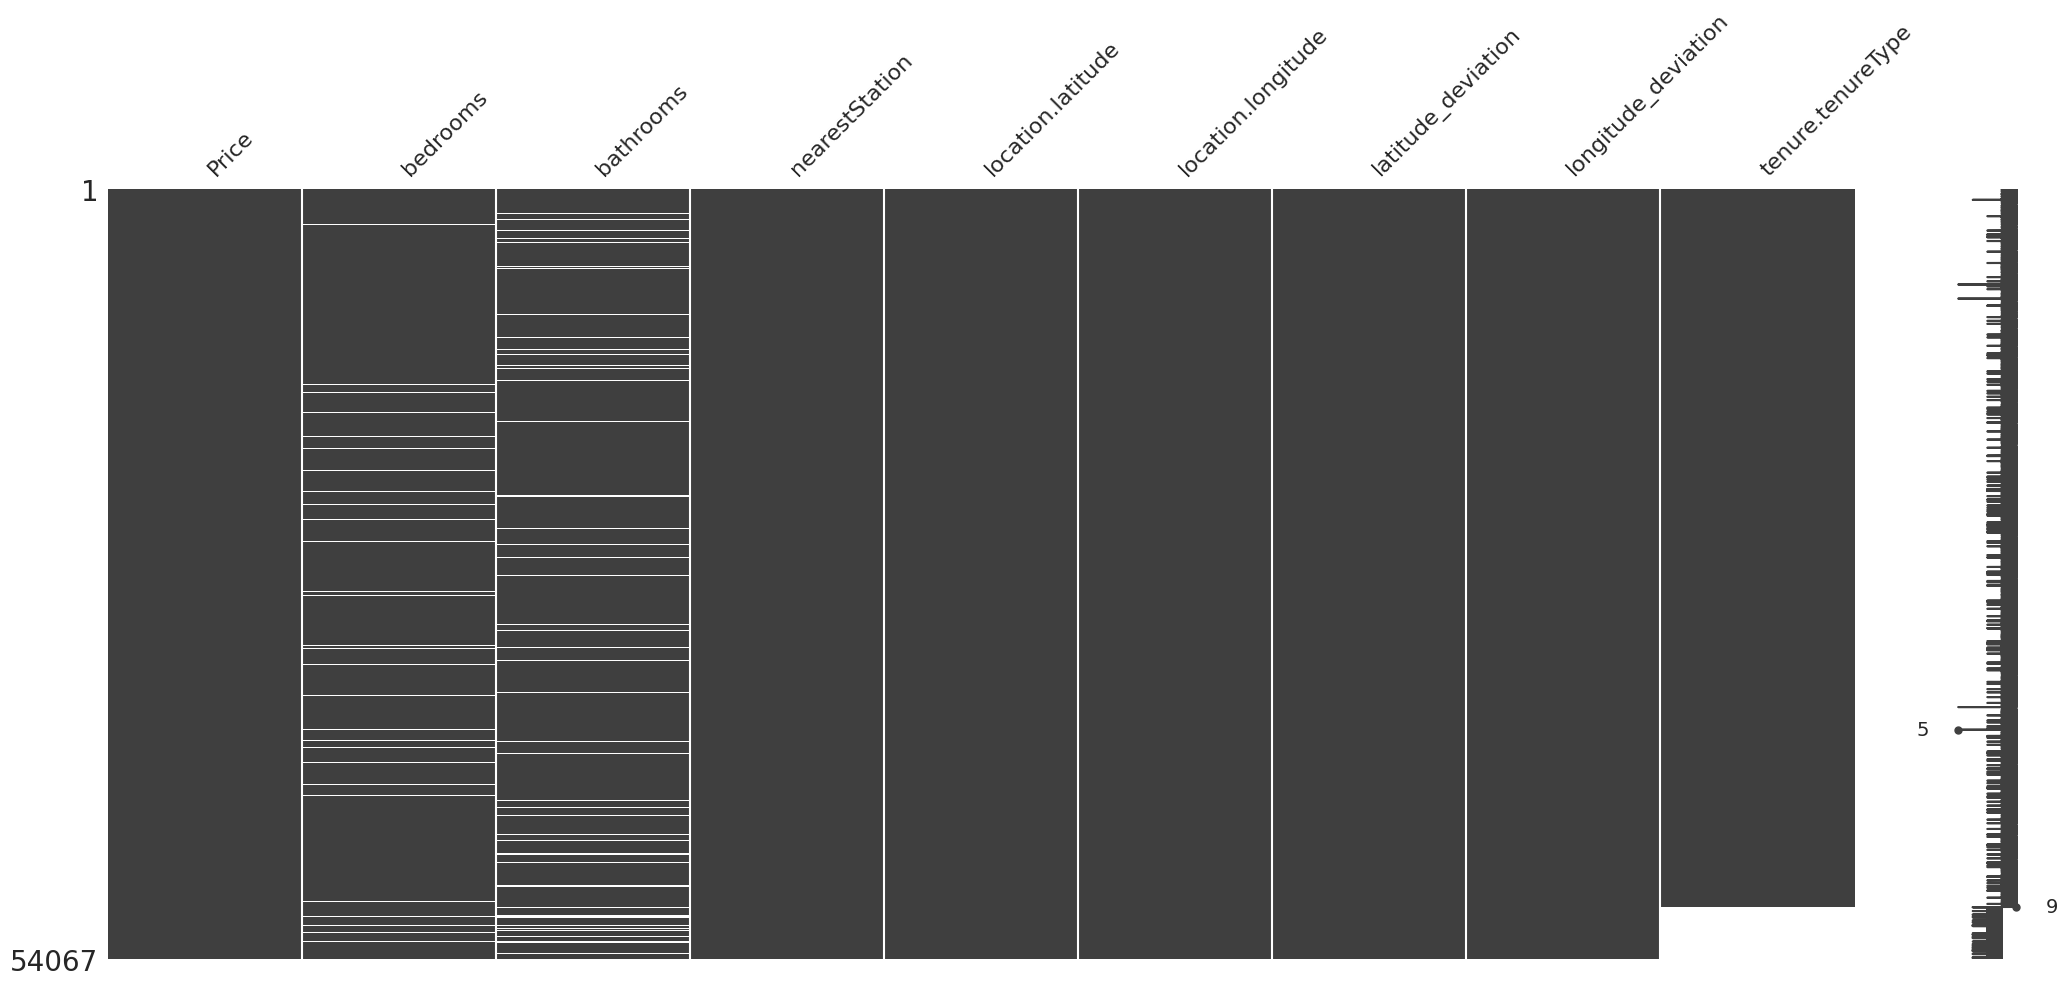

In [11]:
no_cols = ['bedrooms', 'bathrooms', 'tenure.tenureType']
i = (i + 1) % len(no_cols)
# Sort banking by age and visualize
df_sorted = df.sort_values(by=no_cols[i])
msno.matrix(df_sorted)
print(no_cols[i])
plt.show()

In [12]:
if False:
    import numpy as np

    def detect_outliers_tukey(name, data, thresholdP=3):
        outliers = []
        threshold = thresholdP
        try:
            mean = np.mean(data)
        except:
            print(f'error on {name}: partially or fully not numeric')
            return []
        std = np.std(data)

        for i in data:
            z_score = (i - mean) / std
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers


    def get_outlier_dataframe(thresholdA=3):
        outlier_df = pd.DataFrame()
        for each in df.columns:
            outl = detect_outliers_tukey(each, df[each], thresholdP=thresholdA)
            len_outl = len(outl)
            if len_outl > 10: outl = outl[:10]
            #print(f'outliers for {each} {len_outl}/{len(df[each])}: {outl}')

            x = pd.Series([outl, len_outl, f'{len_outl}/{len(df[each])}'])
            outlier_df[each] = x

        outlier_df.index = ['outliers', 'outlier_total', 'outlier_proportion']
        return outlier_df.T


    get_outlier_dataframe()

In [25]:
import numpy as np


def detect_outlier_tukey(name, data, q1_idx=25, q3_idx=75):
    # find q1 and q3 values

    if data.dtype in ['object','category']: return [], []
    data.dropna(inplace=True)
    q1, q3 = np.percentile(sorted(data), [q1_idx, q3_idx])

    # compute IRQ
    iqr = q3 - q1

    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    if data.dtype == float:
        outliers = np.array([x for x in data if x < lower_bound or x > upper_bound]).round(2)
        valid = np.array([x for x in data if lower_bound <= x <= upper_bound]).round(2)
    else:
        outliers = [x for x in data if x < lower_bound or x > upper_bound]
        valid = [x for x in data if lower_bound <= x <= upper_bound]

    return outliers, valid


outliers_df = pd.DataFrame()

for each in df.columns:
    outliers, valid = detect_outlier_tukey(each, df[each], q1_idx=0.1, q3_idx=99.9)

    min_outlier = min(outliers) if len(outliers) > 0 else None
    max_outlier = max(outliers) if len(outliers) > 0 else None

    min_valid = min(valid) if len(valid) > 0 else None
    max_valid = max(valid) if len(valid) > 0 else None

    under = [x for x in outliers if x < min_valid]
    under_max = min(under) if len(under) > 0 else None

    outl_series = pd.Series([sorted(set(outliers)), sorted(list(set(valid))), len(outliers), len(df), under_max, min_valid, max_valid, min_outlier, max_outlier])
    outliers_df[each] = outl_series

outliers_df.index = ['outliers', 'valid','count', 'totol_entries', 'under_outlr', 'min_valid', 'max_valid', 'min_outlr', 'max_outlr']
outliers_df.T


,outliers,valid,count,totol_entries,under_outlr,min_valid,max_valid,min_outlr,max_outlr
Price,[],"[100000, 100500, 101250, 102000, 102500, 10312...",0,54067,None,100000,600000,None,None
bedrooms,[490000.0],"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]",1,54067,None,1.0,7.0,490000.0,490000.0
bathrooms,"[11.0, 12.0]","[1.0, 2.0, 3.0, 4.0, 5.0]",2,54067,None,1.0,5.0,11.0,12.0
nearestStation,"[7.82, 7.88, 8.06, 8.49, 11.46, 13.77, 16.15, ...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",12,54067,None,0.0,7.38,7.82,192.43
location.latitude,[],"[51.3, 51.31, 51.32, 51.33, 51.34, 51.35, 51.3...",0,54067,None,51.3,51.68,None,None
location.longitude,"[51.4, 51.42, 51.47, 51.48, 51.52, 51.54, 51.56]","[-0.5, -0.49, -0.48, -0.47, -0.46, -0.45, -0.4...",10,54067,None,-0.5,0.28,51.4,51.56
latitude_deviation,[],"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0,54067,None,0.0,0.2,None,None
longitude_deviation,"[51.51, 51.52, 51.57, 51.58, 51.63, 51.64, 51.66]","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",10,54067,None,0.0,0.39,51.51,51.66
tenure.tenureType,[],[],0,54067,None,None,None,None,None


In [55]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
import numpy as np


def detect_outlier_kde(name, dataX):
    # find q1 and q3 values
    print(name)

    if dataX.dtype in ['object','category']: return [], []
    dataX.dropna(inplace=True)

    reducing_to_set = False


    if reducing_to_set:
        x = list(set(dataX))
    else:
        x = list(dataX)

    if name in('nearestStation','location.latitude','location.longitude','latitude_deviation','longitude_deviation'):
        #return [], []
        x = [round(a, 3) for a in x]

    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)

    kde.fit(bw='scott', fft=True)
    #pred=kde.evaluate(x_scaled)

    if reducing_to_set:
        x_scaled_set = list(set(x_scaled))
    else:
        x_scaled_set = list(x_scaled)
    pred=kde.evaluate(x_scaled_set)

    n = sum (pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    valid_ind = np.asarray(pred).argsort()[n:]
    outlier_value = np.asarray(x)[outlier_ind]
    valid_value = np.asarray(x)[valid_ind]

    #print(outlier_ind)
    print(outlier_value)
    return outlier_value, valid_value


outliers_df = pd.DataFrame()

for each in df.columns:
    outliers, valid = detect_outlier_kde(each, df[each])

    min_outlier = min(outliers) if len(outliers) > 0 else None
    max_outlier = max(outliers) if len(outliers) > 0 else None

    min_valid = min(valid) if len(valid) > 0 else None
    max_valid = max(valid) if len(valid) > 0 else None

    under = [x for x in outliers if x < min_valid]
    under_max = min(under) if len(under) > 0 else None

    outl_series = pd.Series([sorted(set(outliers)), sorted(list(set(valid))), len(outliers), len(df), under_max, min_valid, max_valid, min_outlier, max_outlier])
    outliers_df[each] = outl_series

outliers_df.index = ['outliers', 'valid','count', 'totol_entries', 'under_outlr', 'min_valid', 'max_valid', 'min_outlr', 'max_outlr']
outliers_df.T


Price


MemoryError: Unable to allocate 21.8 GiB for an array with shape (54067, 54067) and data type float64

In [28]:
if False:
    from sklearn.preprocessing import scale
    from statsmodels.nonparametric.kde import KDEUnivariate
    import numpy as np


    def detect_outlier_kde(name, data, q1_idx=25, q3_idx=75):
        # find q1 and q3 values
        print(name)

        if data.dtype in ['object','category']: return [], []
        data.dropna(inplace=True)

        x_scaled = scale(list(map(float, data)))
        kde = KDEUnivariate(x_scaled)

        kde.fit(bw='scott', fft=True)
        #pred=kde.evaluate(x_scaled)
        x_scaled_set = list(set(x_scaled))
        pred=kde.evaluate(x_scaled_set)

        n = sum (pred < 0.05)
        outlier_ind = np.asarray(pred).argsort()[:n]
        outlier_value = np.asarray(data)[outlier_ind]

        #print(outlier_ind)
        print(outlier_value)
        return outlier_ind, outlier_value


    outliers_df = pd.DataFrame()

    for each in df.columns:
        outliers, valid = detect_outlier_kde(each, df[each], q1_idx=0.1, q3_idx=99.9)

        min_outlier = min(outliers) if len(outliers) > 0 else None
        max_outlier = max(outliers) if len(outliers) > 0 else None

        min_valid = min(valid) if len(valid) > 0 else None
        max_valid = max(valid) if len(valid) > 0 else None

        under = [x for x in outliers if x < min_valid]
        under_max = min(under) if len(under) > 0 else None

        outl_series = pd.Series([sorted(set(outliers)), sorted(list(set(valid))), len(outliers), len(df), under_max, min_valid, max_valid, min_outlier, max_outlier])
        outliers_df[each] = outl_series

    outliers_df.index = ['outliers', 'valid','count', 'totol_entries', 'under_outlr', 'min_valid', 'max_valid', 'min_outlr', 'max_outlr']
    outliers_df.T


Price


KeyboardInterrupt: 

In [ ]:
# Box Plot
#
import seaborn as sns

sns.boxplot(df['nearestStation'])

In [ ]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

In [ ]:
df['tenure.tenureType'] = df['tenure.tenureType'].astype('category')

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

In [ ]:
df.describe().T

In [ ]:
df.describe(include=['object', 'category'], exclude=[]).T

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [ ]:
df.isna().sum()

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms', ascending=False)

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms', ascending=False)

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['longitude_deviation'] > 1]

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['latitude_deviation'] > 1]

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

In [ ]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 4].sort_values('nearestStation', ascending=False)

In [ ]:
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[((df['longitude_deviation'] <= 1) & (df['latitude_deviation'] <= 1))]
df = df[(df['nearestStation'] <= 4)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

In [ ]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
sns.pairplot(df, diag_kind='kde')

In [ ]:
#df.isna().any()
df.isna().sum()

In [ ]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

In [ ]:
df_features = df.drop(LABEL, axis=1)
df_features

In [ ]:
use_one_hot_encoding_not_dummies = False

if use_one_hot_encoding_not_dummies:
    raise NotImplementedError('not implemented one hot encoding yet')

    #from sklearn.preprocessing import OneHotEncoder
    #tenure_encoder = OneHotEncoder()
    #df_tenure_type = tenure_encoder.fit_transform(df_features[['tenure.tenureType']])
else:
    for column in categories:
        df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column, drop_first=True)],
                                axis=1)
        df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [ ]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

In [ ]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

In [ ]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='longitude_deviation', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='latitude_deviation', y='longitude_deviation', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    Exploration for imputation


</h2>
</div>

In [ ]:
df['central_distance'] = (df['latitude_deviation'] ** 2 + df['longitude_deviation'] ** 2) ** 0.5
df

In [ ]:

plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='central_distance', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

In [ ]:
#df.groupby(['tenure.tenureType','bedrooms']).agg({'bedrooms':['mean','min','max']})
df.groupby(['tenure.tenureType', 'bedrooms']).agg('count')